NAME : PINJARI DANISH 
INTERNSHIP IN OASIS INFOBYTE
DOMAIN : DATA ANALYTICS

Wine Quality Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings( "ignore")

original df

In [4]:
df = pd.read_csv('WineQT.csv')

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


As data is numeric first try to make decisiontree regressor

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
num_df = df.copy() ## creating a new df for regressor

In [9]:
num_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

scalling the data applying z-score

In [10]:
from scipy.stats import zscore

In [11]:
num_df=num_df.apply(zscore)

In [12]:
num_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1      -0.292593          1.941813    -1.365027        0.050060   0.234247   
2      -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3       1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   

    alcohol   quality        Id  
0 -0.963382 -0.815724 -1.735618  
1 -0.593601 -0.815724 -1.733462  
2 -0.593601 -0.815724 -1.731306  
3 -0.593601  0.425784 -1.729150  
4 -0.963382 -0.815724 -1.726993

In [13]:
X1 = num_df.drop('quality', axis=1)
y1 = num_df['quality']

In [14]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

In [15]:
regressor = DecisionTreeRegressor()

In [16]:
reg_model = regressor.fit(X1_train,y1_train)

In [17]:
y1_pred = reg_model.predict(X1_test)

In [18]:
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.88
R-squared: 0.06


In [19]:
from sklearn.tree import plot_tree

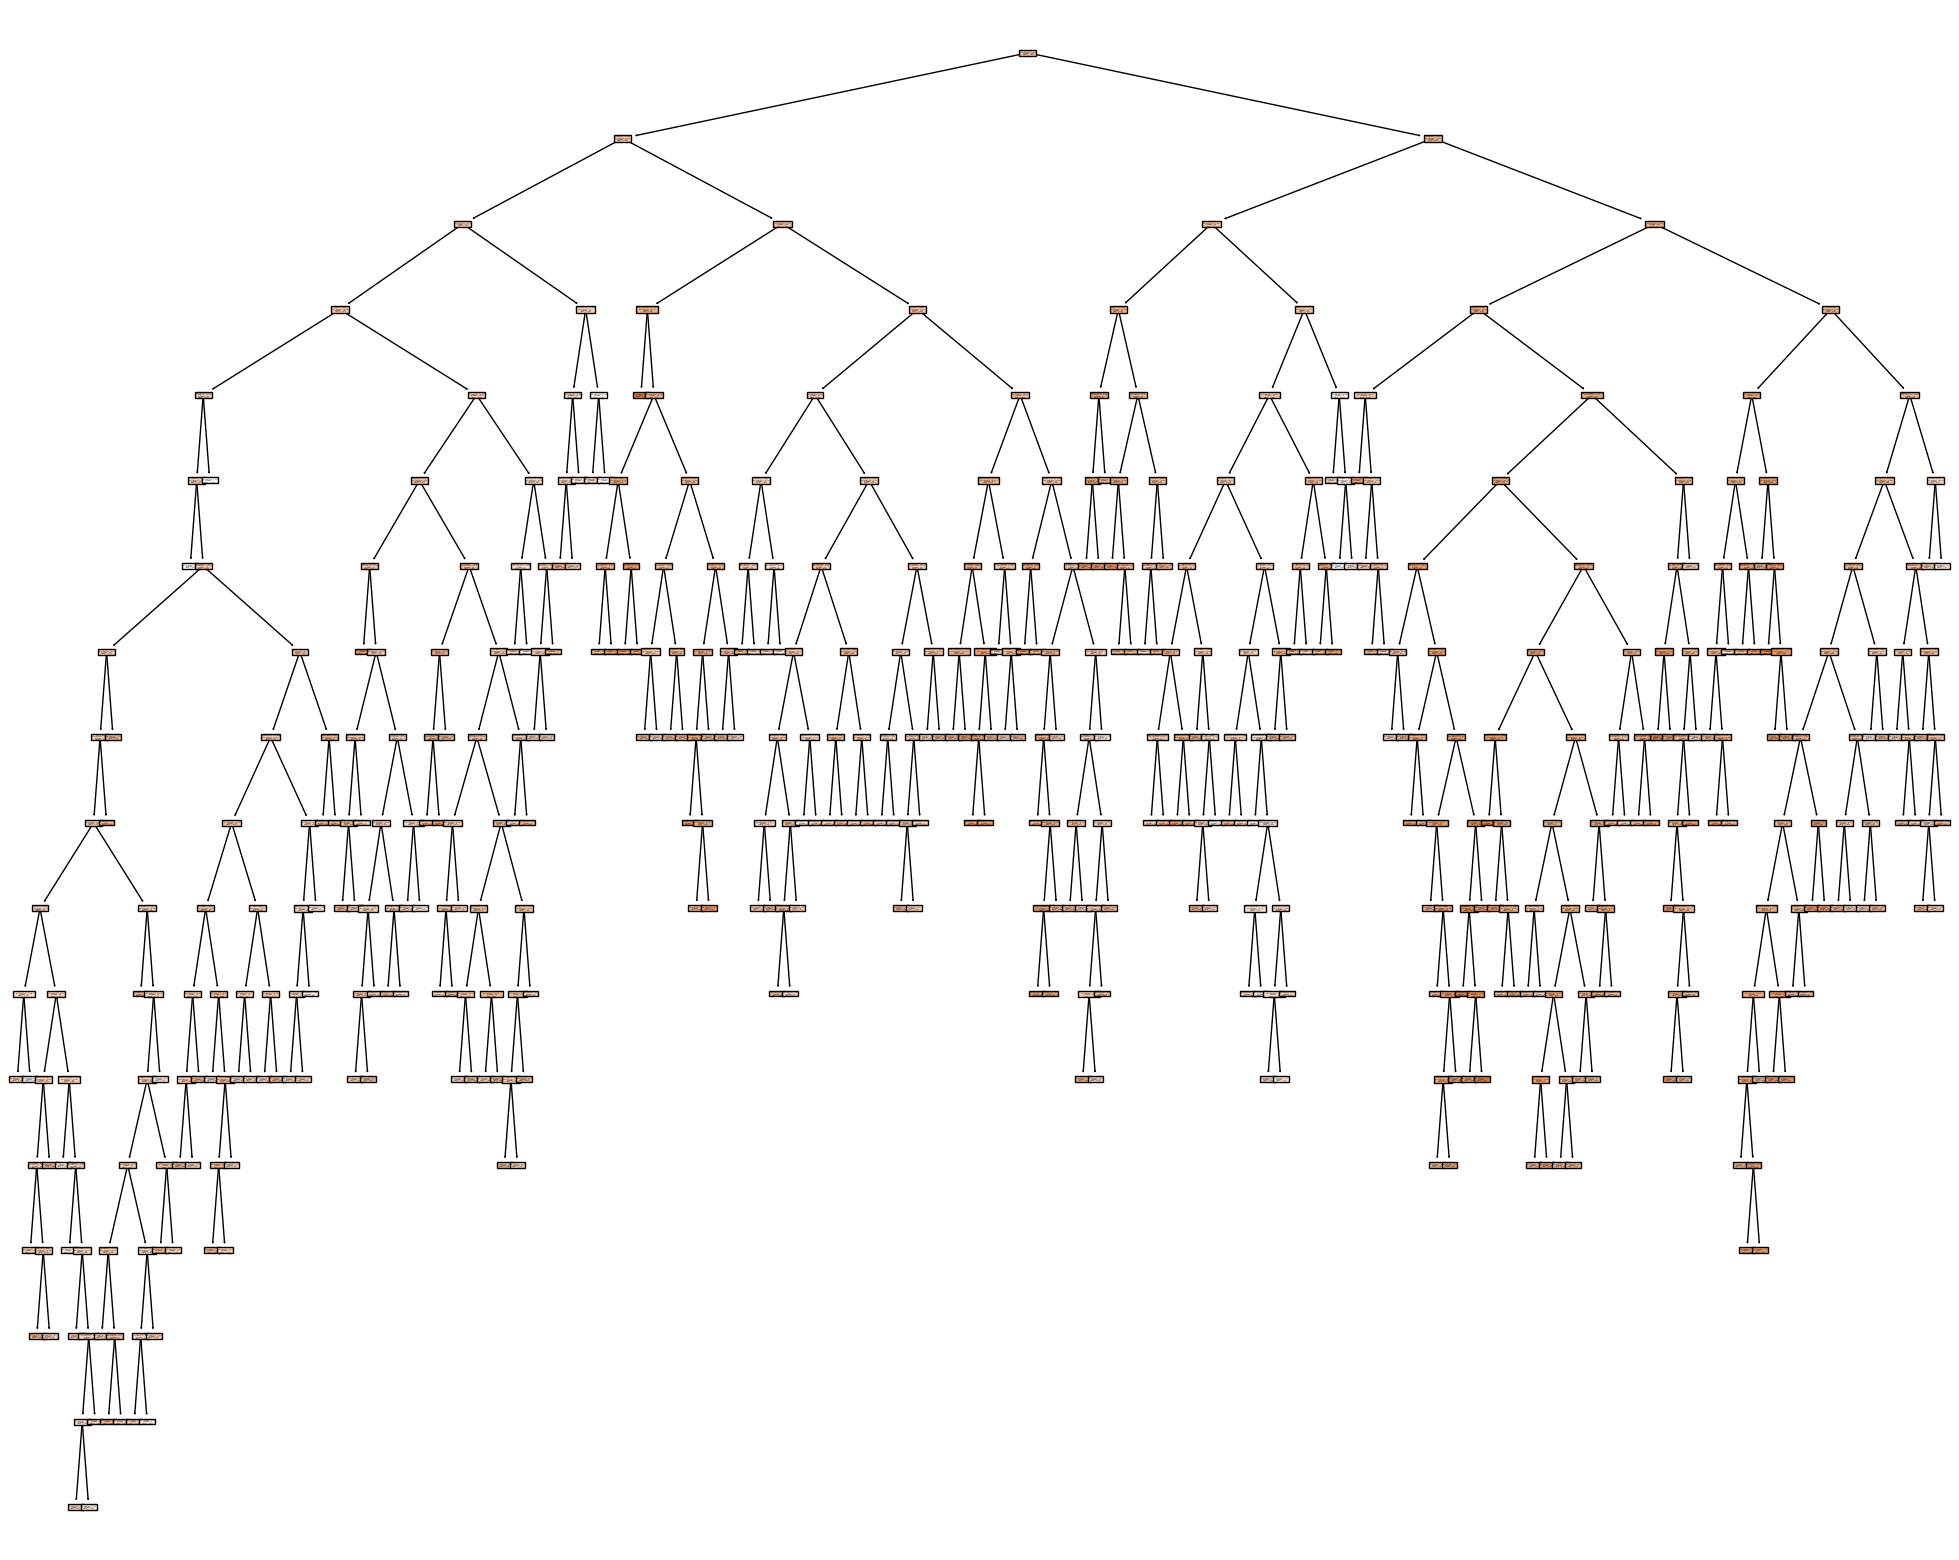

In [20]:
plt.figure(figsize=(25, 20))
plot_tree(reg_model, filled=True, feature_names=X1.columns)
plt.show()

this shows that we should do in classification way only

In [21]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

CATEGORIZING ALL THE NUMERICS INTO CATEGORY

In [22]:
# Define the bin edges and labels for fixed acidity
bin_edges = [0, 7, 8, 9, 10, 16]
bin_labels = ['0-4', '4-7','7-9','9-12','12-16']  # Adjusted bin_labels

# Create a new column 'fixed_acidity_category' based on the binning
df['fixed_acidity_category'] = pd.cut(df['fixed acidity'], bins=bin_edges, labels=bin_labels, include_lowest=True)
#----------------------------------------------------------------
# Define the bin edges and labels for volatile acidity
bin_edges_va = [0, 0.5, 1, 1.5]
bin_labels_va = ['0-0.5', '0.5-1', '1-1.5']

# Create a new column 'volatile_acidity_category' based on the binning
df['volatile_acidity_category'] = pd.cut(df['volatile acidity'], bins=bin_edges_va, labels=bin_labels_va, include_lowest=True)
#----------------------------------------------------------------
# Define the bin edges and labels for citric acid
bin_edges_ca = [0, 0.25, 0.5, 0.75, 1]
bin_labels_ca = ['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1']

# Create a new column 'citric_acid_category' based on the binning
df['citric_acid_category'] = pd.cut(df['citric acid'], bins=bin_edges_ca, labels=bin_labels_ca, include_lowest=True)
#----------------------------------------------------------------

# Define the bin edges and labels for residual sugar
bin_edges_rs = [0, 5, 10, 15.5]
bin_labels_rs = ['0-5', '5-10', '10-15.5']

# Create a new column 'residual_sugar_category' based on the binning
df['residual_sugar_category'] = pd.cut(df['residual sugar'], bins=bin_edges_rs, labels=bin_labels_rs, include_lowest=True)
#----------------------------------------------------------------

# Define the bin edges and labels for chlorides
bin_edges_chlorides = [0, 0.08, 0.1, 0.2, 0.611]  # Adjusted to include the maximum value
bin_labels_chlorides = ['0-0.08', '0.08-0.1', '0.1-0.2', '0.2-0.611']

# Create a new column 'chlorides_category' based on the binning
df['chlorides_category'] = pd.cut(df['chlorides'], bins=bin_edges_chlorides, labels=bin_labels_chlorides, include_lowest=True)

#----------------------------------------------------------------

# Define the bin edges and labels for free sulfur dioxide
bin_edges_freeso2 = [0, 10, 20, 30, 40, 72]  # Adjusted to include the maximum value
bin_labels_freeso2 = ['0-10', '10-20', '20-30', '30-40', '40-72']

# Create a new column 'free_sulfur_dioxide_category' based on the binning
df['free_sulfur_dioxide_category'] = pd.cut(df['free sulfur dioxide'], bins=bin_edges_freeso2, labels=bin_labels_freeso2, include_lowest=True)

#----------------------------------------------------------------

# Define the bin edges and labels for total sulfur dioxide
bin_edges_tso2 = [0, 50, 100, 150, 200, 289]  # Adjusted to include the maximum value
bin_labels_tso2 = ['0-50', '50-100', '100-150', '150-200', '200-289']

# Create a new column 'total_sulfur_dioxide_category' based on the binning
df['total_sulfur_dioxide_category'] = pd.cut(df['total sulfur dioxide'], bins=bin_edges_tso2, labels=bin_labels_tso2, include_lowest=True)


#----------------------------------------------------------------

# Define the bin edges and labels for density
bin_edges_density = [0.990, 0.995, 1.000, 1.005, 1.010, 1.015]  # Adjusted to include the maximum value
bin_labels_density = ['0.990-0.995', '0.995-1.000', '1.000-1.005', '1.005-1.010', '1.010-1.015']

# Create a new column 'density_category' based on the binning
df['density_category'] = pd.cut(df['density'], bins=bin_edges_density, labels=bin_labels_density, include_lowest=True)
#----------------------------------------------------------------

# Define the bin edges and labels for pH
bin_edges_pH = [2.5, 3.0, 3.5, 4.0, 4.1]  # Adjusted to include the maximum value
bin_labels_pH = ['2.5-3.0', '3.0-3.5', '3.5-4.0', '4.0-4.1']

# Create a new column 'pH_category' based on the binning
df['pH_category'] = pd.cut(df['pH'], bins=bin_edges_pH, labels=bin_labels_pH, include_lowest=True)

#----------------------------------------------------------------

# Define the bin edges and labels for sulphates
bin_edges_sulphates = [0.0, 0.5, 1.0, 1.5, 2.0]  # Adjusted to include the maximum value
bin_labels_sulphates = ['0.0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0']

# Create a new column 'sulphates_category' based on the binning
df['sulphates_category'] = pd.cut(df['sulphates'], bins=bin_edges_sulphates, labels=bin_labels_sulphates, include_lowest=True)


#----------------------------------------------------------------

# Define the bin edges and labels for alcohol
bin_edges_alcohol = [8.0, 10.0, 12.0, 14.0, 15.0]  # Adjusted to include the maximum value
bin_labels_alcohol = ['8.0-10.0', '10.0-12.0', '12.0-14.0', '14.0-15.0']

# Create a new column 'alcohol_category' based on the binning
df['alcohol_category'] = pd.cut(df['alcohol'], bins=bin_edges_alcohol, labels=bin_labels_alcohol, include_lowest=True)

#----------------------------------------------------------------

# Define the conditions for categorizing quality
conditions = [
    (df['quality'] == 3) | (df['quality'] == 4) | (df['quality'] == 5),
    (df['quality'] == 6) | (df['quality'] == 7) | (df['quality'] == 8),
]

# Define the corresponding labels
labels = ['Low Quality', 'High Quality']

# Create a new column 'quality_category' based on the conditions and labels
df['quality_category'] = np.select(conditions, labels, default='Unknown')

creating a new data frame which has all the categories

In [23]:
# Extract columns with category and object data types
cat_df= df.select_dtypes(include=['category', 'object']).copy()

In [24]:
cat_df

fixed_acidity_category volatile_acidity_category citric_acid_category  \
0                       4-7                     0.5-1               0-0.25   
1                       4-7                     0.5-1               0-0.25   
2                       4-7                     0.5-1               0-0.25   
3                     12-16                     0-0.5             0.5-0.75   
4                       4-7                     0.5-1               0-0.25   
...                     ...                       ...                  ...   
1138                    0-4                     0.5-1               0-0.25   
1139                    0-4                     0.5-1               0-0.25   
1140                    0-4                     0.5-1               0-0.25   
1141                    0-4                     0.5-1               0-0.25   
1142                    0-4                     0.5-1               0-0.25   

     residual_sugar_category chlorides_category free_sulfur_dioxide_category  \
0                        0-5             0-0.08                        10-20   
1                        0-5           0.08-0.1                        20-30   
2                        0-5           0.08-0.1                        10-20   
3                        0-5             0-0.08                        10-20   
4                        0-5             0-0.08                        10-20   
...                      ...                ...                          ...   
1138                     0-5             0-0.08                        20-30   
1139                     0-5             0-0.08                        20-30   
1140                     0-5           0.08-0.1                        30-40   
1141                     0-5             0-0.08                        30-40   
1142                     0-5             0-0.08                        30-40   

     total_sulfur_dioxide_category density_category pH_category  \
0                             0-50      0.995-1.000     3.5-4.0   
1                           50-100      0.995-1.000     3.0-3.5   
2                           50-100      0.995-1.000     3.0-3.5   
3                           50-100      0.995-1.000     3.0-3.5   
4                             0-50      0.995-1.000     3.5-4.0   
...                            ...              ...         ...   
1138                          0-50      0.995-1.000     3.0-3.5   
1139                          0-50      0.995-1.000     3.0-3.5   
1140                          0-50      0.990-0.995     3.0-3.5   
1141                        50-100      0.995-1.000     3.5-4.0   
1142                          0-50      0.995-1.000     3.5-4.0   

     sulphates_category alcohol_category quality_category  
0               0.5-1.0         8.0-10.0      Low Quality  
1               0.5-1.0         8.0-10.0      Low Quality  
2               0.5-1.0         8.0-10.0      Low Quality  
3               0.5-1.0         8.0-10.0     High Quality  
4               0.5-1.0         8.0-10.0      Low Quality  
...                 ...              ...              ...  
1138            0.5-1.0        10.0-12.0     High Quality  
1139            0.5-1.0         8.0-10.0     High Quality  
1140            0.5-1.0        10.0-12.0      Low Quality  
1141            0.5-1.0        10.0-12.0     High Quality  
1142            0.5-1.0        10.0-12.0      Low Quality  

[1143 rows x 12 columns]

In [25]:
cat_df.shape

(1143, 12)

In [26]:
cat_df.columns

Index(['fixed_acidity_category', 'volatile_acidity_category',
       'citric_acid_category', 'residual_sugar_category', 'chlorides_category',
       'free_sulfur_dioxide_category', 'total_sulfur_dioxide_category',
       'density_category', 'pH_category', 'sulphates_category',
       'alcohol_category', 'quality_category'],
      dtype='object')

In [27]:
cat_df = pd.get_dummies(cat_df, columns=['fixed_acidity_category', 'volatile_acidity_category',
       'citric_acid_category', 'residual_sugar_category', 'chlorides_category',
       'free_sulfur_dioxide_category', 'total_sulfur_dioxide_category',
       'density_category', 'pH_category', 'sulphates_category',
       'alcohol_category'], drop_first=True)

In [28]:
cat_df.head()

quality_category  fixed_acidity_category_4-7  fixed_acidity_category_7-9  \
0      Low Quality                        True                       False   
1      Low Quality                        True                       False   
2      Low Quality                        True                       False   
3     High Quality                       False                       False   
4      Low Quality                        True                       False   

   fixed_acidity_category_9-12  fixed_acidity_category_12-16  \
0                        False                         False   
1                        False                         False   
2                        False                         False   
3                        False                          True   
4                        False                         False   

   volatile_acidity_category_0.5-1  volatile_acidity_category_1-1.5  \
0                             True                            False   
1                             True                            False   
2                             True                            False   
3                            False                            False   
4                             True                            False   

   citric_acid_category_0.25-0.5  citric_acid_category_0.5-0.75  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                           True   
4                          False                          False   

   citric_acid_category_0.75-1  ...  density_category_1.010-1.015  \
0                        False  ...                         False   
1                        False  ...                         False   
2                        False  ...                         False   
3                        False  ...                         False   
4                        False  ...                         False   

   pH_category_3.0-3.5  pH_category_3.5-4.0  pH_category_4.0-4.1  \
0                False                 True                False   
1                 True                False                False   
2                 True                False                False   
3                 True                False                False   
4                False                 True                False   

   sulphates_category_0.5-1.0  sulphates_category_1.0-1.5  \
0                        True                       False   
1                        True                       False   
2                        True                       False   
3                        True                       False   
4                        True                       False   

   sulphates_category_1.5-2.0  alcohol_category_10.0-12.0  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   alcohol_category_12.0-14.0  alcohol_category_14.0-15.0  
0                       False                       False  
1                       False                       False  
2                       False                       False  
3                       False                       False  
4                       False                       False  

[5 rows x 36 columns]

In [29]:
cat_df['quality_category'] = cat_df['quality_category'].astype('category').cat.codes

In [30]:
cat_df.head()

quality_category  fixed_acidity_category_4-7  fixed_acidity_category_7-9  \
0                 1                        True                       False   
1                 1                        True                       False   
2                 1                        True                       False   
3                 0                       False                       False   
4                 1                        True                       False   

   fixed_acidity_category_9-12  fixed_acidity_category_12-16  \
0                        False                         False   
1                        False                         False   
2                        False                         False   
3                        False                          True   
4                        False                         False   

   volatile_acidity_category_0.5-1  volatile_acidity_category_1-1.5  \
0                             True                            False   
1                             True                            False   
2                             True                            False   
3                            False                            False   
4                             True                            False   

   citric_acid_category_0.25-0.5  citric_acid_category_0.5-0.75  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                           True   
4                          False                          False   

   citric_acid_category_0.75-1  ...  density_category_1.010-1.015  \
0                        False  ...                         False   
1                        False  ...                         False   
2                        False  ...                         False   
3                        False  ...                         False   
4                        False  ...                         False   

   pH_category_3.0-3.5  pH_category_3.5-4.0  pH_category_4.0-4.1  \
0                False                 True                False   
1                 True                False                False   
2                 True                False                False   
3                 True                False                False   
4                False                 True                False   

   sulphates_category_0.5-1.0  sulphates_category_1.0-1.5  \
0                        True                       False   
1                        True                       False   
2                        True                       False   
3                        True                       False   
4                        True                       False   

   sulphates_category_1.5-2.0  alcohol_category_10.0-12.0  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   alcohol_category_12.0-14.0  alcohol_category_14.0-15.0  
0                       False                       False  
1                       False                       False  
2                       False                       False  
3                       False                       False  
4                       False                       False  

[5 rows x 36 columns]

In [31]:
X2 = cat_df.drop('quality_category', axis=1)
y2 = cat_df['quality_category']

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1)

In [33]:
y2_train.value_counts()

quality_category
0    423
1    377
Name: count, dtype: int64

In [34]:
tree1_model = DecisionTreeClassifier()
tree1_model.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [35]:
y2_train.value_counts(normalize=True)

quality_category
0    0.52875
1    0.47125
Name: proportion, dtype: float64

In [36]:
from sklearn.metrics import classification_report, accuracy_score
# Step 3: Make Predictions
ytrain2_pred = tree1_model.predict(X2_train)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y2_train, ytrain2_pred)
classification_report_result = classification_report(y2_train, ytrain2_pred)

In [37]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       423
           1       0.94      0.86      0.90       377

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800



In [38]:
ytest2_pred = tree1_model.predict(X2_test)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y2_test, ytest2_pred)
classification_report_result = classification_report(y2_test, ytest2_pred)

In [39]:
## acuracy on test

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_result)

Accuracy: 0.71
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       198
           1       0.64      0.72      0.68       145

    accuracy                           0.71       343
   macro avg       0.71      0.71      0.71       343
weighted avg       0.72      0.71      0.71       343



tree1_model is a overfitted model
accuracy on train is 90%
accuracy on test is 70%

PRUNING TREE

In [40]:
prun_tree_model = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=60,min_samples_leaf=5,max_features='sqrt', random_state=1 )

In [41]:
prun_tree_model.fit(X2_train,y2_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=60, random_state=1)

In [42]:
# Make predictions on the training set
ytrain2_pred = prun_tree_model.predict(X2_train)

# Make predictions on the test set
ytest2_pred = prun_tree_model.predict(X2_test)

In [43]:
print("Training Set Classification Report:")
print(classification_report(y2_train, ytrain2_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       423
           1       0.70      0.68      0.69       377

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800



In [44]:
print("Test Set Classification Report:")
print(classification_report(y2_test, ytest2_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       198
           1       0.62      0.72      0.67       145

    accuracy                           0.70       343
   macro avg       0.70      0.70      0.70       343
weighted avg       0.71      0.70      0.70       343



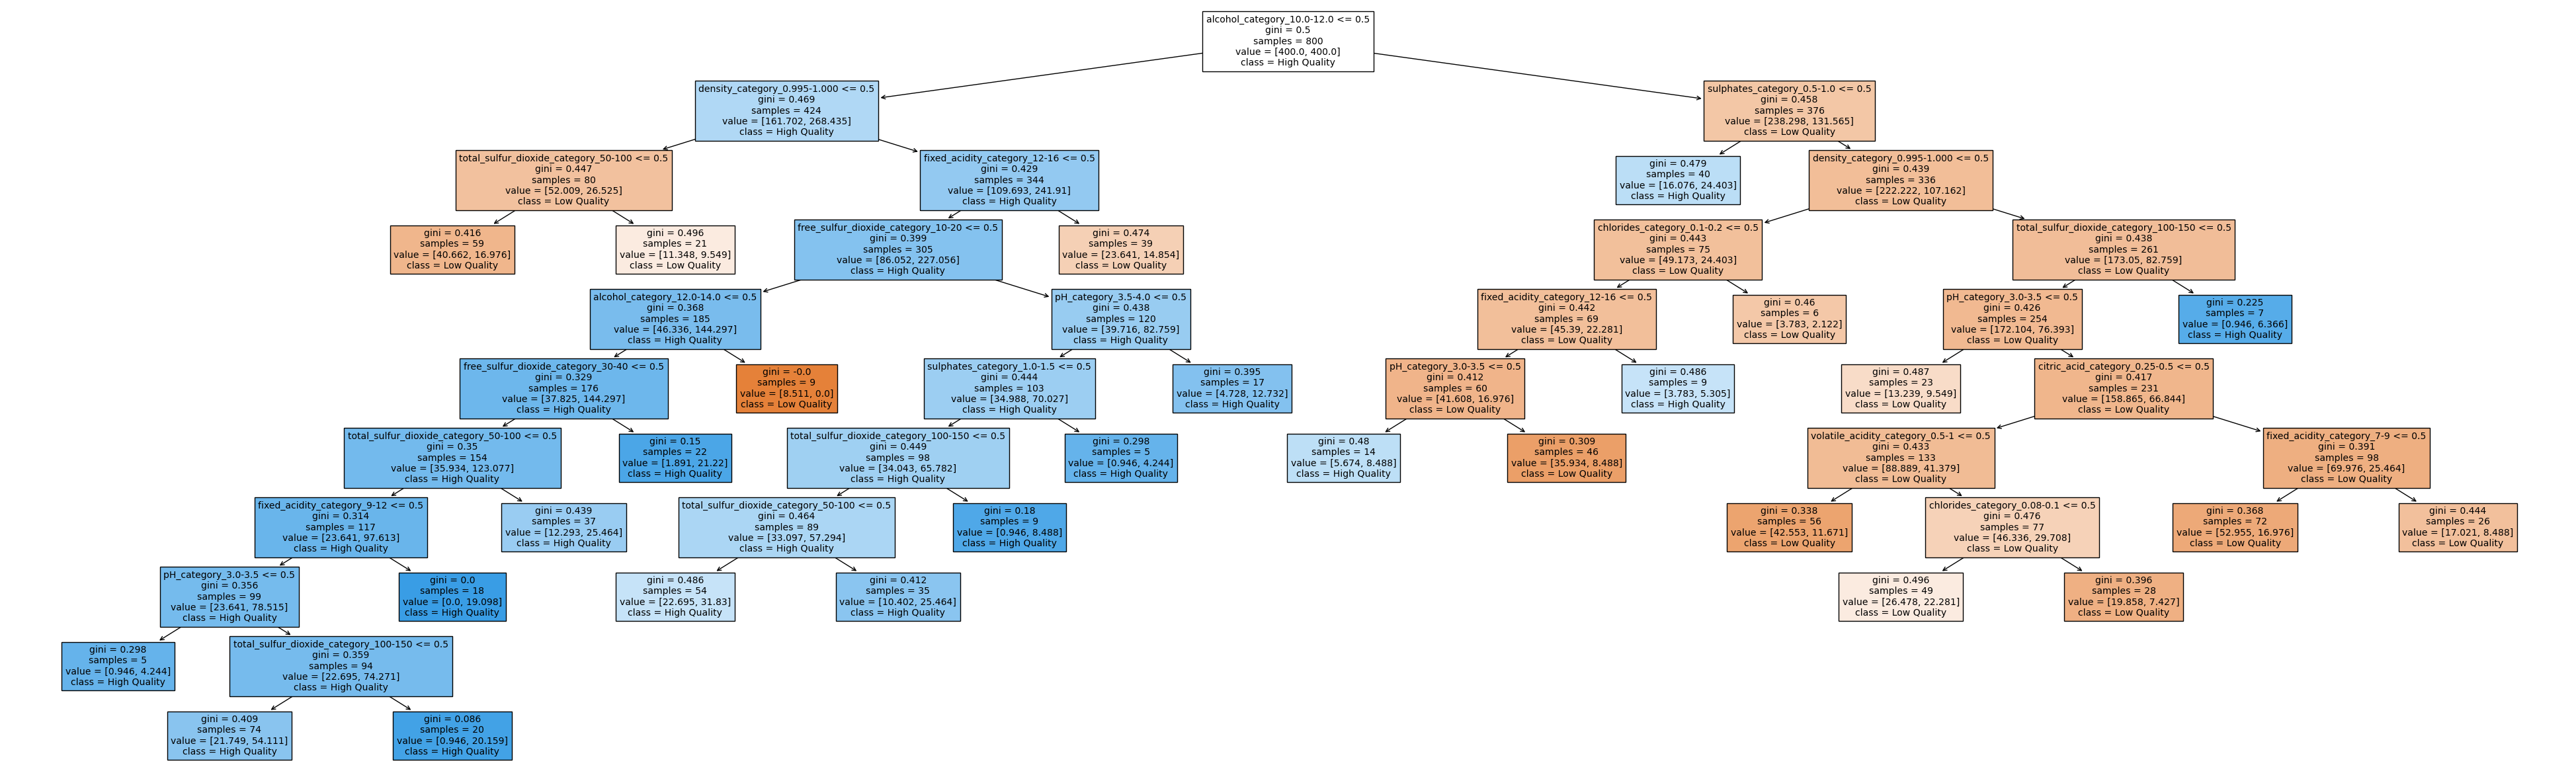

In [45]:
# Plot the decision tree
class_names_str = ["Low Quality", "High Quality"]
plt.figure(figsize=(50, 15))
plot_tree(prun_tree_model, filled=True, feature_names=X2_train.columns,class_names=class_names_str)
plt.show()

By doing pruning the overfitting promblem of our model is solved now it a balanced model as it works similar on both train and test on both the classes
Accuracy on train: 72-----> model: Prun_tree_model
accuracy on test: 73

using grid search to fing best parameters

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = { 
    'max_depth': [10, 15, 20],
    'min_samples_split': [40, 60, 80,100],
    'min_samples_leaf': [3, 5, 7,10]
}

In [48]:
grid_search = GridSearchCV(prun_tree_model, param_grid, cv=10)

In [49]:
grid_search.fit(X2_train,y2_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=10, max_features='sqrt',
                                              min_samples_leaf=5,
                                              min_samples_split=60,
                                              random_state=1),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [40, 60, 80, 100]})

In [50]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 60}


In [51]:
best_model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=5,min_samples_split=100, random_state=1)

In [52]:
best_model.fit(X2_train,y2_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=100,
                       random_state=1)

In [53]:
# Make predictions on the training set
ytrain2_pred = best_model.predict(X2_train)

# Make predictions on the test set
ytest2_pred = best_model.predict(X2_test)

In [54]:
print("Training Set Classification Report:")
print(classification_report(y2_train, ytrain2_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       423
           1       0.71      0.68      0.70       377

    accuracy                           0.72       800
   macro avg       0.72      0.72      0.72       800
weighted avg       0.72      0.72      0.72       800



In [55]:
print("Test Set Classification Report:")
print(classification_report(y2_test, ytest2_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       198
           1       0.66      0.78      0.72       145

    accuracy                           0.74       343
   macro avg       0.74      0.75      0.74       343
weighted avg       0.75      0.74      0.74       343



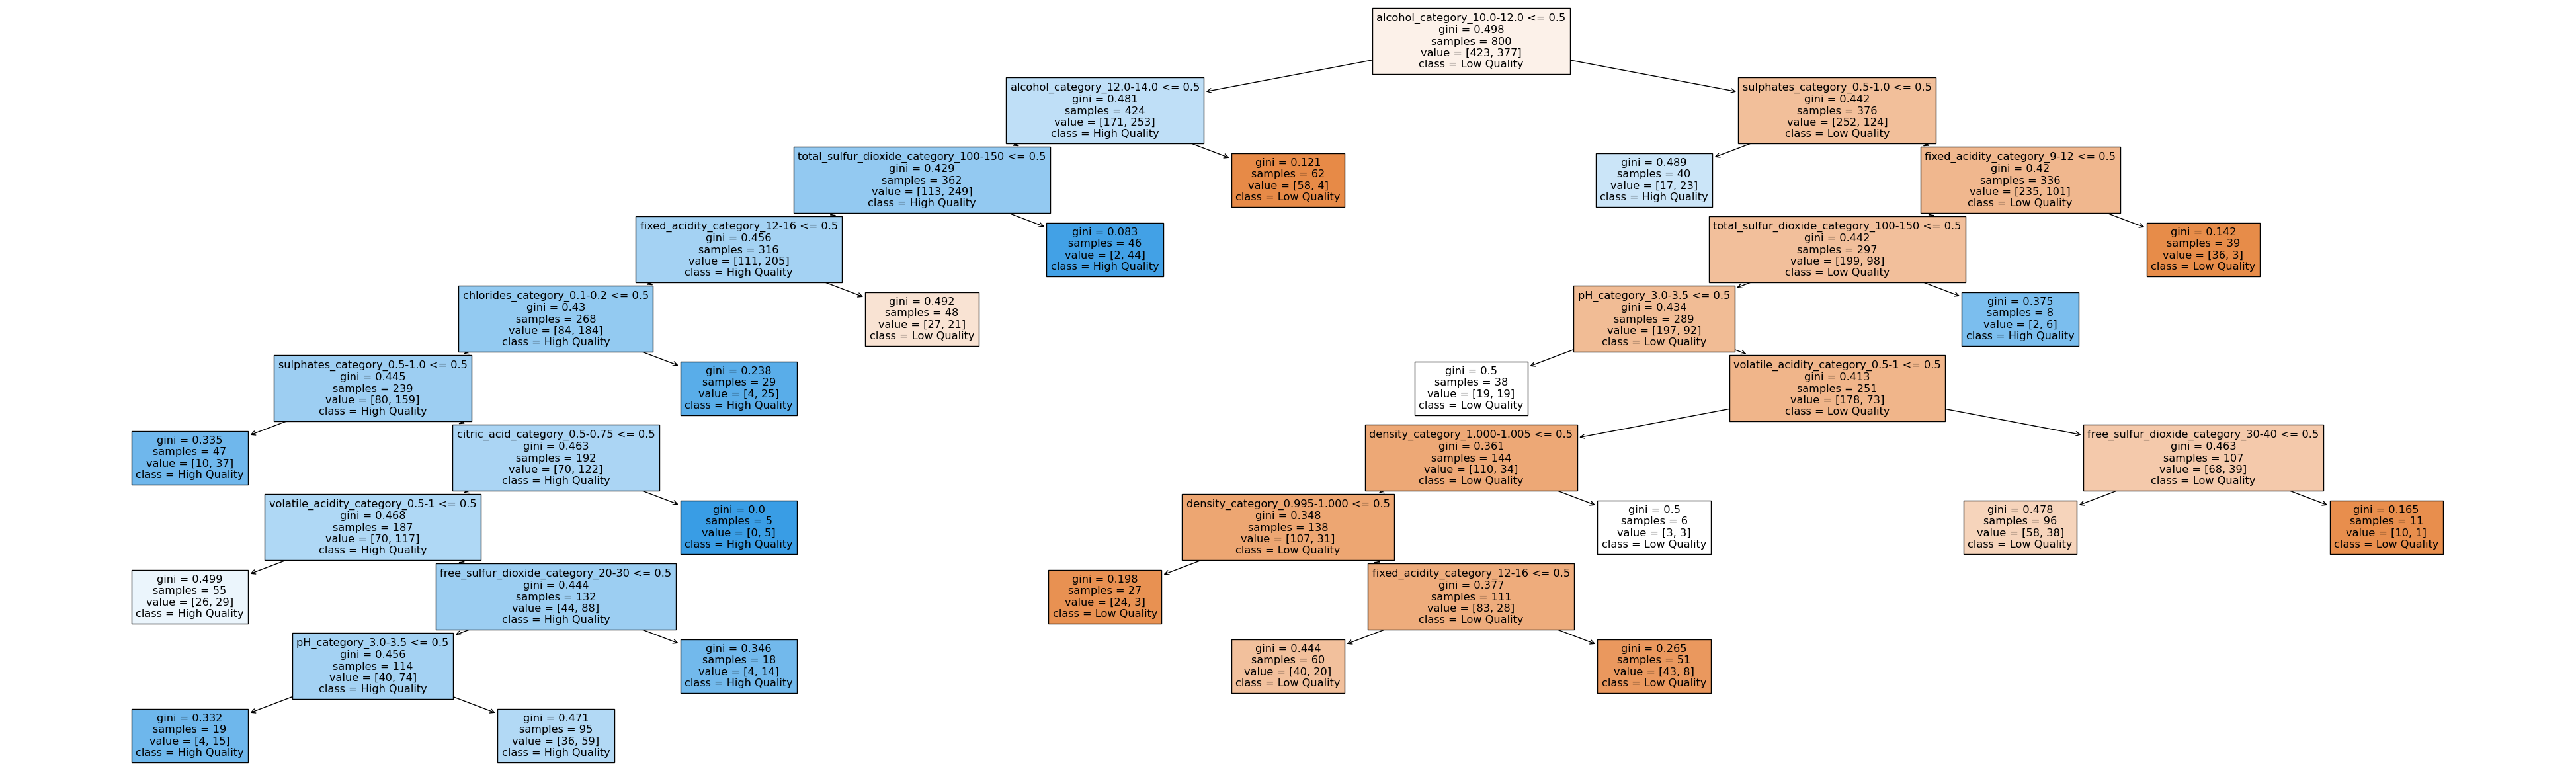

In [56]:
# Plot the decision tree
class_names_str = ["Low Quality", "High Quality"]
plt.figure(figsize=(50, 15))
plot_tree(best_model, filled=True, feature_names=X2_train.columns,class_names=class_names_str)
plt.show()

In [57]:
prun_tree_model.feature_importances_

array([0.00000000e+00, 3.31107780e-03, 1.88500240e-02, 1.01203274e-01,
       2.13111292e-02, 0.00000000e+00, 3.11454052e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.30653418e-02,
       1.07862755e-04, 0.00000000e+00, 1.07601340e-02, 0.00000000e+00,
       9.17243857e-03, 0.00000000e+00, 2.71358782e-02, 8.36399997e-02,
       0.00000000e+00, 0.00000000e+00, 1.72375689e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.62857137e-02, 1.27436870e-03,
       0.00000000e+00, 6.07355837e-02, 2.72164783e-03, 0.00000000e+00,
       3.13281628e-01, 1.11653669e-01, 0.00000000e+00])

In [58]:
feature_importance = pd.DataFrame(prun_tree_model.feature_importances_, index=X2_train.columns, columns=['Importance'] )
feature_importance

Importance
fixed_acidity_category_4-7               0.000000
fixed_acidity_category_7-9               0.003311
fixed_acidity_category_9-12              0.018850
fixed_acidity_category_12-16             0.101203
volatile_acidity_category_0.5-1          0.021311
volatile_acidity_category_1-1.5          0.000000
citric_acid_category_0.25-0.5            0.003115
citric_acid_category_0.5-0.75            0.000000
citric_acid_category_0.75-1              0.000000
residual_sugar_category_5-10             0.000000
residual_sugar_category_10-15.5          0.000000
chlorides_category_0.08-0.1              0.013065
chlorides_category_0.1-0.2               0.000108
chlorides_category_0.2-0.611             0.000000
free_sulfur_dioxide_category_10-20       0.010760
free_sulfur_dioxide_category_20-30       0.000000
free_sulfur_dioxide_category_30-40       0.009172
free_sulfur_dioxide_category_40-72       0.000000
total_sulfur_dioxide_category_50-100     0.027136
total_sulfur_dioxide_category_100-150    0.083640
total_sulfur_dioxide_category_150-200    0.000000
total_sulfur_dioxide_category_200-289    0.000000
density_category_0.995-1.000             0.172376
density_category_1.000-1.005             0.000000
density_category_1.005-1.010             0.000000
density_category_1.010-1.015             0.000000
pH_category_3.0-3.5                      0.046286
pH_category_3.5-4.0                      0.001274
pH_category_4.0-4.1                      0.000000
sulphates_category_0.5-1.0               0.060736
sulphates_category_1.0-1.5               0.002722
sulphates_category_1.5-2.0               0.000000
alcohol_category_10.0-12.0               0.313282
alcohol_category_12.0-14.0               0.111654
alcohol_category_14.0-15.0               0.000000

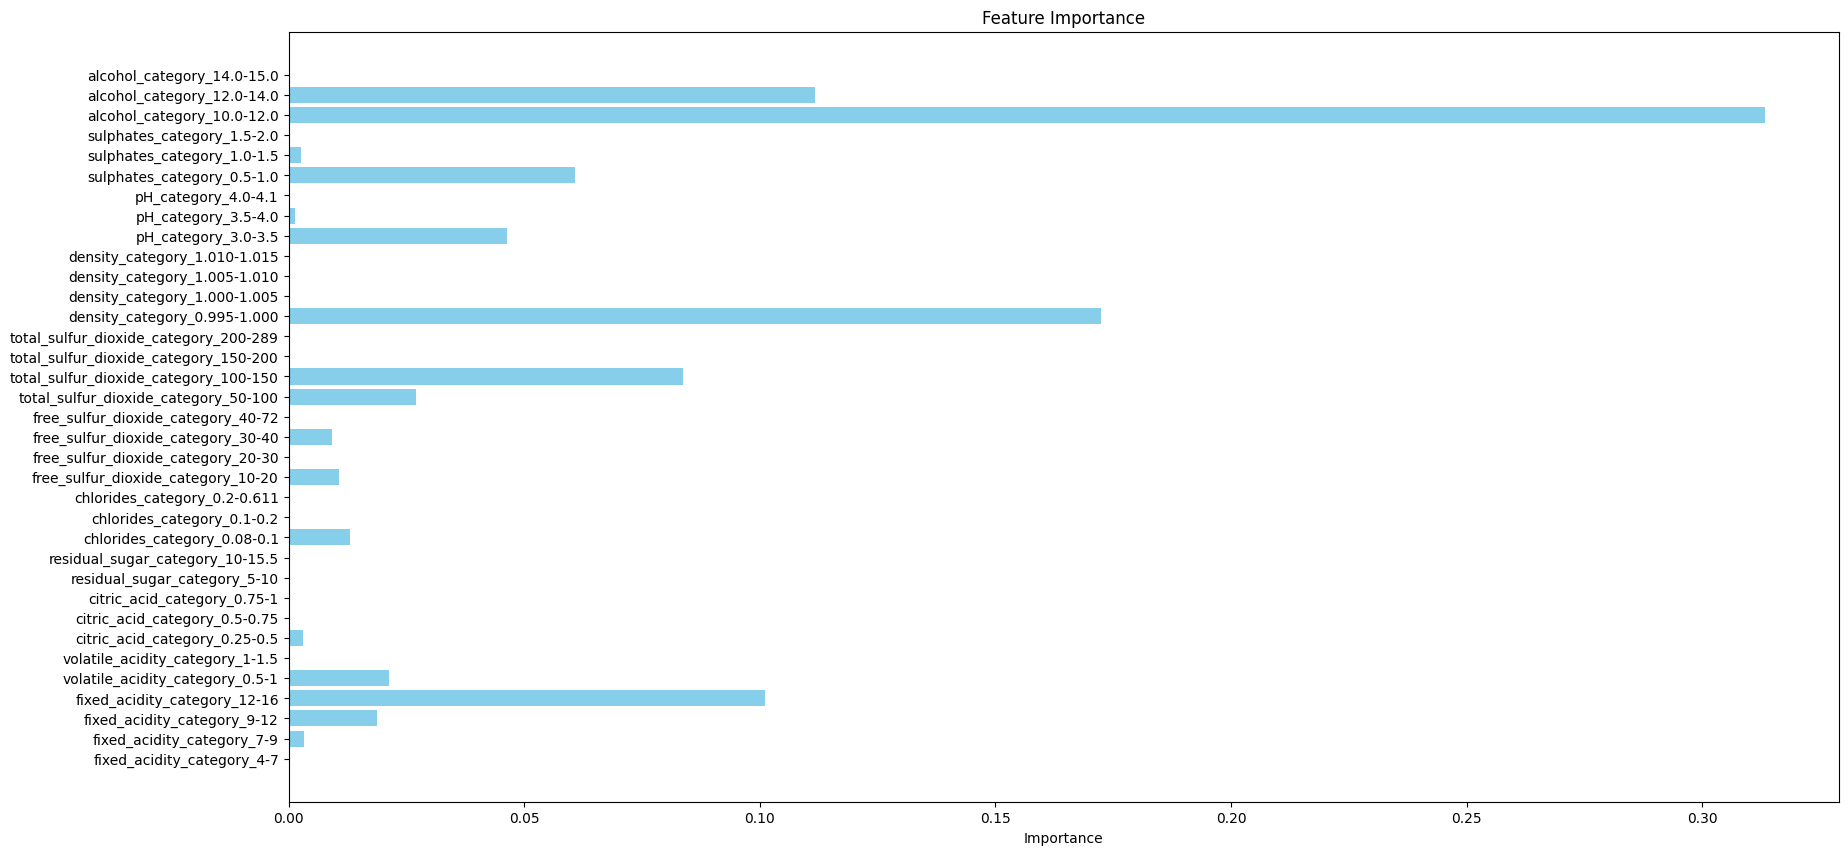

In [59]:
# Plot bar chart
plt.figure(figsize=(20, 10))
plt.barh(feature_importance.index, feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [60]:
cat_df.head()

quality_category  fixed_acidity_category_4-7  fixed_acidity_category_7-9  \
0                 1                        True                       False   
1                 1                        True                       False   
2                 1                        True                       False   
3                 0                       False                       False   
4                 1                        True                       False   

   fixed_acidity_category_9-12  fixed_acidity_category_12-16  \
0                        False                         False   
1                        False                         False   
2                        False                         False   
3                        False                          True   
4                        False                         False   

   volatile_acidity_category_0.5-1  volatile_acidity_category_1-1.5  \
0                             True                            False   
1                             True                            False   
2                             True                            False   
3                            False                            False   
4                             True                            False   

   citric_acid_category_0.25-0.5  citric_acid_category_0.5-0.75  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                           True   
4                          False                          False   

   citric_acid_category_0.75-1  ...  density_category_1.010-1.015  \
0                        False  ...                         False   
1                        False  ...                         False   
2                        False  ...                         False   
3                        False  ...                         False   
4                        False  ...                         False   

   pH_category_3.0-3.5  pH_category_3.5-4.0  pH_category_4.0-4.1  \
0                False                 True                False   
1                 True                False                False   
2                 True                False                False   
3                 True                False                False   
4                False                 True                False   

   sulphates_category_0.5-1.0  sulphates_category_1.0-1.5  \
0                        True                       False   
1                        True                       False   
2                        True                       False   
3                        True                       False   
4                        True                       False   

   sulphates_category_1.5-2.0  alcohol_category_10.0-12.0  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   alcohol_category_12.0-14.0  alcohol_category_14.0-15.0  
0                       False                       False  
1                       False                       False  
2                       False                       False  
3                       False                       False  
4                       False                       False  

[5 rows x 36 columns]

In [61]:
zero_importance_features = feature_importance[feature_importance['Importance'] == 0].index

In [62]:
zero_importance_features

Index(['fixed_acidity_category_4-7', 'volatile_acidity_category_1-1.5',
       'citric_acid_category_0.5-0.75', 'citric_acid_category_0.75-1',
       'residual_sugar_category_5-10', 'residual_sugar_category_10-15.5',
       'chlorides_category_0.2-0.611', 'free_sulfur_dioxide_category_20-30',
       'free_sulfur_dioxide_category_40-72',
       'total_sulfur_dioxide_category_150-200',
       'total_sulfur_dioxide_category_200-289', 'density_category_1.000-1.005',
       'density_category_1.005-1.010', 'density_category_1.010-1.015',
       'pH_category_4.0-4.1', 'sulphates_category_1.5-2.0',
       'alcohol_category_14.0-15.0'],
      dtype='object')

In [63]:
cat_df.head()

quality_category  fixed_acidity_category_4-7  fixed_acidity_category_7-9  \
0                 1                        True                       False   
1                 1                        True                       False   
2                 1                        True                       False   
3                 0                       False                       False   
4                 1                        True                       False   

   fixed_acidity_category_9-12  fixed_acidity_category_12-16  \
0                        False                         False   
1                        False                         False   
2                        False                         False   
3                        False                          True   
4                        False                         False   

   volatile_acidity_category_0.5-1  volatile_acidity_category_1-1.5  \
0                             True                            False   
1                             True                            False   
2                             True                            False   
3                            False                            False   
4                             True                            False   

   citric_acid_category_0.25-0.5  citric_acid_category_0.5-0.75  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                           True   
4                          False                          False   

   citric_acid_category_0.75-1  ...  density_category_1.010-1.015  \
0                        False  ...                         False   
1                        False  ...                         False   
2                        False  ...                         False   
3                        False  ...                         False   
4                        False  ...                         False   

   pH_category_3.0-3.5  pH_category_3.5-4.0  pH_category_4.0-4.1  \
0                False                 True                False   
1                 True                False                False   
2                 True                False                False   
3                 True                False                False   
4                False                 True                False   

   sulphates_category_0.5-1.0  sulphates_category_1.0-1.5  \
0                        True                       False   
1                        True                       False   
2                        True                       False   
3                        True                       False   
4                        True                       False   

   sulphates_category_1.5-2.0  alcohol_category_10.0-12.0  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   alcohol_category_12.0-14.0  alcohol_category_14.0-15.0  
0                       False                       False  
1                       False                       False  
2                       False                       False  
3                       False                       False  
4                       False                       False  

[5 rows x 36 columns]

In [64]:
cat2_df = cat_df.copy() ## for a safer side just creating a copy of df

In [65]:
cat2_df.head(2)

quality_category  fixed_acidity_category_4-7  fixed_acidity_category_7-9  \
0                 1                        True                       False   
1                 1                        True                       False   

   fixed_acidity_category_9-12  fixed_acidity_category_12-16  \
0                        False                         False   
1                        False                         False   

   volatile_acidity_category_0.5-1  volatile_acidity_category_1-1.5  \
0                             True                            False   
1                             True                            False   

   citric_acid_category_0.25-0.5  citric_acid_category_0.5-0.75  \
0                          False                          False   
1                          False                          False   

   citric_acid_category_0.75-1  ...  density_category_1.010-1.015  \
0                        False  ...                         False   
1                        False  ...                         False   

   pH_category_3.0-3.5  pH_category_3.5-4.0  pH_category_4.0-4.1  \
0                False                 True                False   
1                 True                False                False   

   sulphates_category_0.5-1.0  sulphates_category_1.0-1.5  \
0                        True                       False   
1                        True                       False   

   sulphates_category_1.5-2.0  alcohol_category_10.0-12.0  \
0                       False                       False   
1                       False                       False   

   alcohol_category_12.0-14.0  alcohol_category_14.0-15.0  
0                       False                       False  
1                       False                       False  

[2 rows x 36 columns]

In [66]:
#again we are apliting data
X3 = cat_df.drop('quality_category', axis=1)
y3 = cat_df['quality_category']

In [67]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=1)

In [68]:
## model name is imp_model
imp_model = DecisionTreeClassifier(random_state=1)
imp_model.fit(X3_train, y3_train)

DecisionTreeClassifier(random_state=1)

In [69]:
ytrain3_pred = imp_model.predict(X3_train)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y3_train, ytrain3_pred)
classification_report_result = classification_report(y3_train, ytrain3_pred)

ytest3_pred = imp_model.predict(X3_test)

# Step 4: Evaluate the Model
accuracy = accuracy_score(y3_test, ytest3_pred)
classification_report_result = classification_report(y3_test, ytest3_pred)

In [70]:
print("Training Set Classification Report:")
print(classification_report(y3_train, ytrain3_pred))
print("Test Set Classification Report:")
print(classification_report(y3_test, ytest3_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       423
           1       0.94      0.86      0.90       377

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       198
           1       0.65      0.72      0.68       145

    accuracy                           0.72       343
   macro avg       0.71      0.72      0.71       343
weighted avg       0.72      0.72      0.72       343



without any fine tunning of hyperparameters we can see that the accuracy has gone up
but the model is overfitted
imp_model
accuracy on train: 88
accuracy on test : 70

prun the tree

In [71]:
prun_imp_tree_model = DecisionTreeClassifier(class_weight='balanced',max_depth=10,min_samples_split=60,min_samples_leaf=5,max_features='sqrt', random_state=1 )

In [72]:
prun_imp_tree_model.fit(X3_train,y3_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=60, random_state=1)

In [73]:
# Make predictions on the training set
ytrain3_pred = prun_imp_tree_model.predict(X3_train)

# Make predictions on the test set
ytest3_pred = prun_imp_tree_model.predict(X3_test)

In [74]:
print("Training Set Classification Report:")
print(classification_report(y3_train, ytrain3_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       423
           1       0.70      0.68      0.69       377

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800



In [75]:
print("Test Set Classification Report:")
print(classification_report(y3_test, ytest3_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       198
           1       0.62      0.72      0.67       145

    accuracy                           0.70       343
   macro avg       0.70      0.70      0.70       343
weighted avg       0.71      0.70      0.70       343



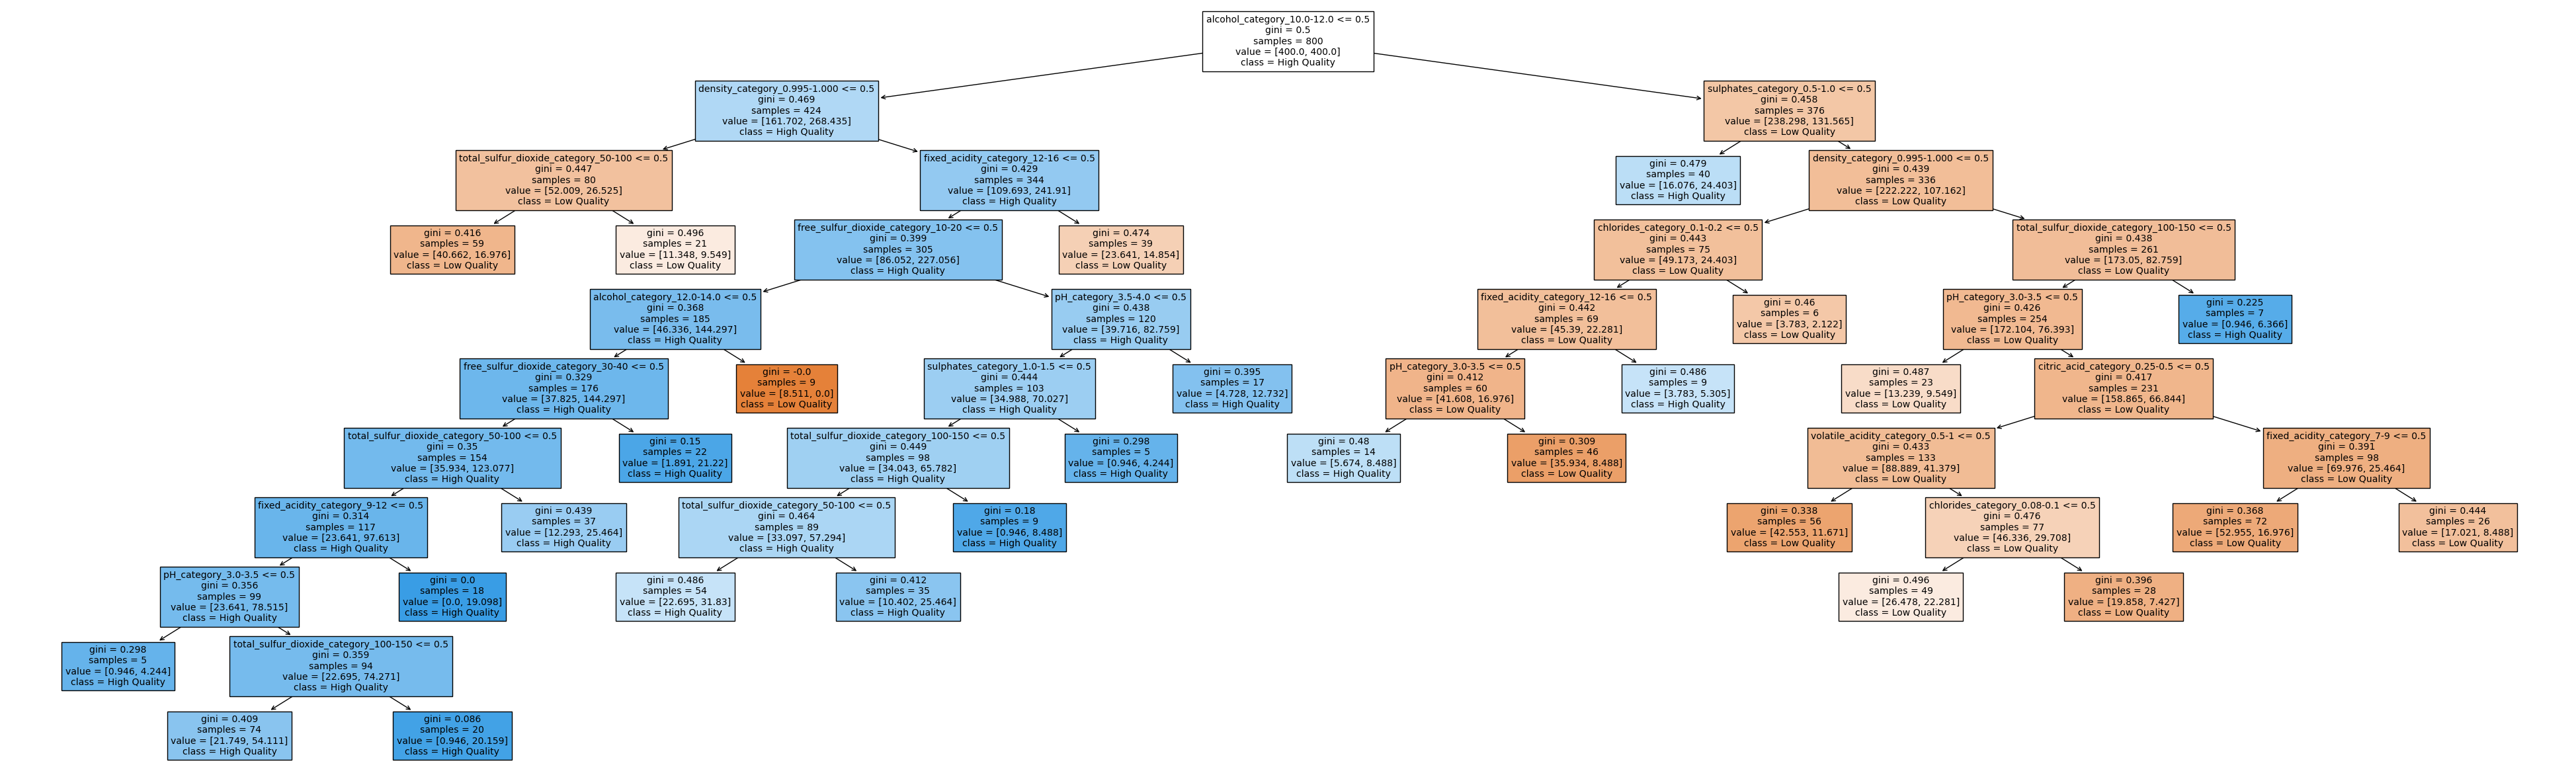

In [76]:
# Plot the decision tree
class_names_str = ["Low Quality", "High Quality"]
plt.figure(figsize=(50, 15))
plot_tree(prun_imp_tree_model, filled=True, feature_names=X3_train.columns,class_names=class_names_str)
plt.show()

after pruning the performance is increased it is a balanced model
model: prun_imp_tree_model
train: 72%
test: 72%

lets use grid search for this model

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid1 = {
    'max_depth': [5, 10,15],
    'min_samples_split': [60,80,100],
    'min_samples_leaf': [5,7, 10],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [79]:
grid_search1 = GridSearchCV(prun_imp_tree_model, param_grid1, cv=10)

In [80]:
grid_search1.fit(X3_train, y3_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=10, max_features='sqrt',
                                              min_samples_leaf=5,
                                              min_samples_split=60,
                                              random_state=1),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [5, 7, 10],
                         'min_samples_split': [60, 80, 100]})

In [81]:
print("Best Hyperparameters:", grid_search1.best_params_)

Best Hyperparameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 60}


creating new model with best params and imp features

In [82]:
best_imp_model= DecisionTreeClassifier(max_depth=15,min_samples_leaf=5,min_samples_split=60,class_weight=None, max_features='sqrt', random_state=1)

In [83]:
best_imp_model.fit(X3_train,y3_train)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=60, random_state=1)

In [84]:
ytrain3_pred = best_imp_model.predict(X3_train)

# Make predictions on the test set
ytest3_pred = best_imp_model.predict(X3_test)

In [85]:
print("Training Set Classification Report:")
print(classification_report(y3_train, ytrain3_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74       423
           1       0.73      0.60      0.66       377

    accuracy                           0.71       800
   macro avg       0.71      0.70      0.70       800
weighted avg       0.71      0.71      0.70       800



In [86]:
print("Test Set Classification Report:")
print(classification_report(y3_test, ytest3_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       198
           1       0.66      0.70      0.68       145

    accuracy                           0.72       343
   macro avg       0.71      0.71      0.71       343
weighted avg       0.72      0.72      0.72       343



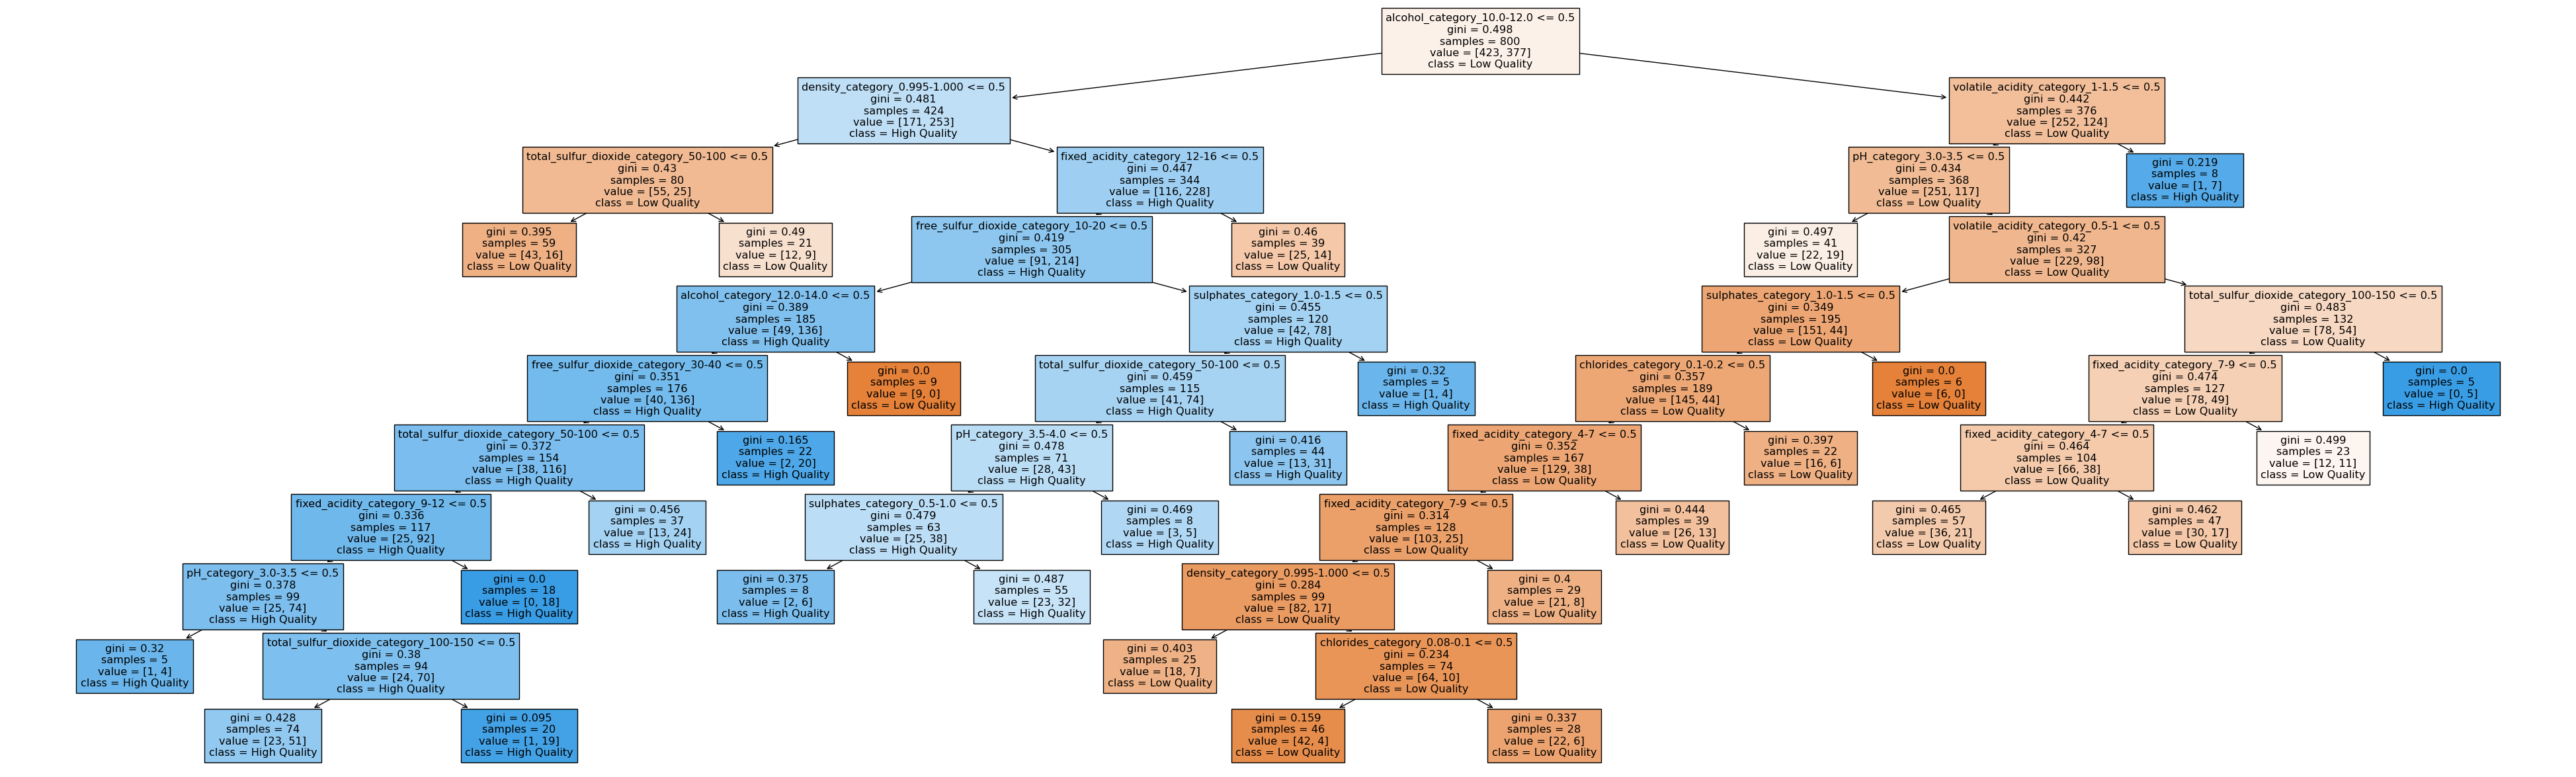

In [87]:
# Plot the decision tree
class_names_str = ["Low Quality", "High Quality"]
plt.figure(figsize=(50, 15))
plot_tree(best_imp_model, filled=True, feature_names=X3_train.columns,class_names=class_names_str)
plt.show()

model: best_imp_model---model using grid search and imp features
train : 72
test : 71

using a random forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=15, min_samples_split=80, min_samples_leaf= 5)

In [90]:
random_forest_model.fit(X3_train, y3_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=80,
                       n_estimators=50, random_state=1)

In [91]:
# Make predictions on the training set
ytrain3_pred = random_forest_model.predict(X3_train)

# Make predictions on the test set
ytest3_pred = random_forest_model.predict(X3_test)

In [92]:
print("Training Set Classification Report:")
print(classification_report(y3_train, ytrain3_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       423
           1       0.75      0.66      0.70       377

    accuracy                           0.74       800
   macro avg       0.74      0.73      0.73       800
weighted avg       0.74      0.74      0.74       800



In [93]:
print("Test Set Classification Report:")
print(classification_report(y3_test, ytest3_pred))

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.78       198
           1       0.70      0.71      0.70       145

    accuracy                           0.75       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.75      0.75      0.75       343



In [94]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [ 2,5,10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [95]:
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')

In [96]:
grid_search.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=15, min_samples_leaf=5,
                                              min_samples_split=80,
                                              n_estimators=50, random_state=1),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [97]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'class_weight': None, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [98]:
best_random_forest_model = RandomForestClassifier(class_weight='balanced', max_depth=10, max_features='sqrt', min_samples_leaf=20, min_samples_split=40, n_estimators=50, random_state=1)
best_random_forest_model.fit(X3_train,y3_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=20, min_samples_split=40,
                       n_estimators=50, random_state=1)

In [99]:
ytrain3_pred = best_random_forest_model.predict(X3_train)

# Make predictions on the test set
ytest3_pred = best_random_forest_model.predict(X3_test)

print("Training Set Classification Report:")
print(classification_report(y3_train, ytrain3_pred))


print("Test Set Classification Report:")
print(classification_report(y3_test, ytest3_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       423
           1       0.71      0.72      0.72       377

    accuracy                           0.73       800
   macro avg       0.73      0.73      0.73       800
weighted avg       0.73      0.73      0.73       800

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       198
           1       0.65      0.77      0.70       145

    accuracy                           0.73       343
   macro avg       0.73      0.73      0.73       343
weighted avg       0.74      0.73      0.73       343



using a XGBoost

In [100]:
from xgboost import XGBClassifier

In [101]:
xgboost_model = XGBClassifier(random_state=1, n_estimators=50, max_depth=10, learning_rate= 0.01, subsample = 0.8, colsample_bytree= 0.8  )

In [102]:
xgboost_model.fit(X3_train, y3_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [103]:
ytrain3_pred = xgboost_model.predict(X3_train)

# Make predictions on the test set
ytest3_pred = xgboost_model.predict(X3_test)

print("Training Set Classification Report:")
print(classification_report(y3_train, ytrain3_pred))


print("Test Set Classification Report:")
print(classification_report(y3_test, ytest3_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       423
           1       0.81      0.73      0.77       377

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       198
           1       0.69      0.75      0.72       145

    accuracy                           0.75       343
   macro avg       0.75      0.75      0.75       343
weighted avg       0.76      0.75      0.75       343



In [104]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [105]:
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5, scoring='accuracy')

In [106]:
grid_search.fit(X3_train, y3_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [107]:
best_xgboost_model = grid_search.best_estimator_

In [108]:
ytrain3_pred = best_xgboost_model.predict(X3_train)

# Make predictions on the test set
ytest3_pred = best_xgboost_model.predict(X3_test)

print("Training Set Classification Report:")
print(classification_report(y3_train, ytrain3_pred))


print("Test Set Classification Report:")
print(classification_report(y3_test, ytest3_pred))

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       423
           1       0.76      0.73      0.75       377

    accuracy                           0.77       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.77      0.76       800

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       198
           1       0.68      0.79      0.73       145

    accuracy                           0.76       343
   macro avg       0.75      0.76      0.75       343
weighted avg       0.77      0.76      0.76       343



In [109]:
import pickle

In [110]:
pickle_out = open("wine.pickle","wb")
pickle.dump(random_forest_model, pickle_out)
loaded_model = pickle.load(open("wine.pickle","rb"))
result = loaded_model.score(X3_test, y3_test)
print(result)

0.7463556851311953
